# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabinda
Processing Record 2 of Set 1 | kirksville
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | mogocha
Processing Record 5 of Set 1 | fort st. john
Processing Record 6 of Set 1 | tangalle
Processing Record 7 of Set 1 | zolochiv
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | akureyri
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | fushun
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | dauphin
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | longyearbyen
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabinda,-5.5500,12.2000,300.11,80,72,2.78,AO,1701335220
1,kirksville,40.1948,-92.5833,279.85,69,0,5.14,US,1701335221
2,wailua homesteads,22.0669,-159.3780,296.39,87,20,2.06,US,1701335221
3,mogocha,53.7333,119.7667,256.29,95,89,1.39,RU,1701335221
4,fort st. john,56.2499,-120.8529,263.74,98,60,0.55,CA,1701335221


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabinda,-5.5500,12.2000,300.11,80,72,2.78,AO,1701335220
1,kirksville,40.1948,-92.5833,279.85,69,0,5.14,US,1701335221
2,wailua homesteads,22.0669,-159.3780,296.39,87,20,2.06,US,1701335221
3,mogocha,53.7333,119.7667,256.29,95,89,1.39,RU,1701335221
4,fort st. john,56.2499,-120.8529,263.74,98,60,0.55,CA,1701335221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

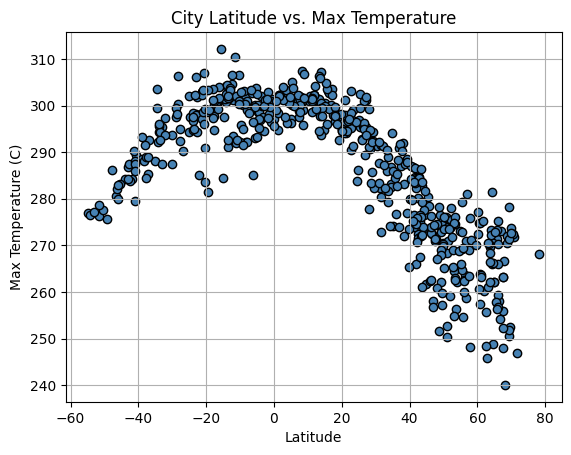

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            facecolor="steelblue",
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

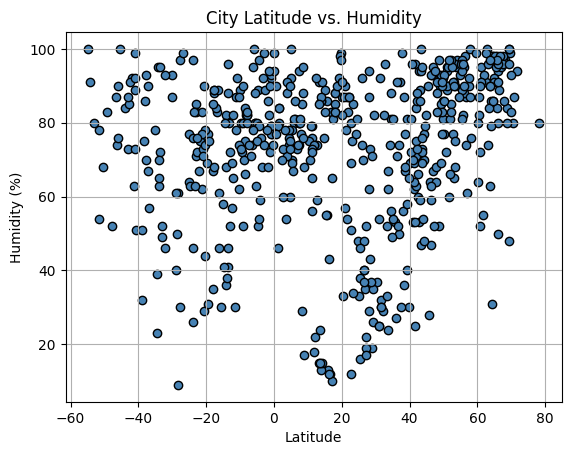

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

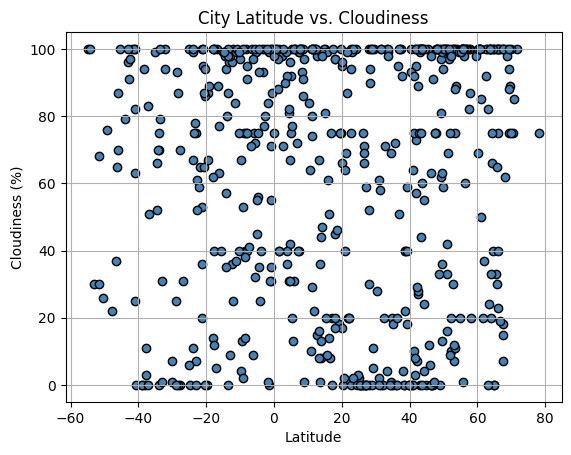

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

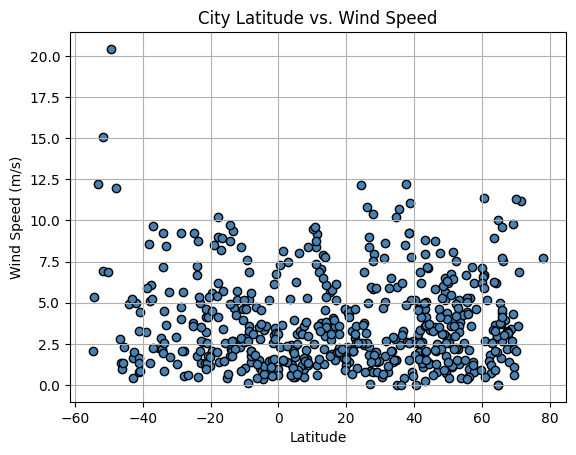

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            facecolor="steelblue", 
            edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_values, y_values, coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(df[x_values], df[y_values])
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(df[x_values], df[y_values])
    plt.plot(df[x_values], intercept + slope * df[x_values], color="red", linewidth=1)
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    print(f"The r value is: {r_value}")
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kirksville,40.1948,-92.5833,279.85,69,0,5.14,US,1701335221
2,wailua homesteads,22.0669,-159.3780,296.39,87,20,2.06,US,1701335221
3,mogocha,53.7333,119.7667,256.29,95,89,1.39,RU,1701335221
4,fort st. john,56.2499,-120.8529,263.74,98,60,0.55,CA,1701335221
5,tangalle,6.0240,80.7911,300.88,80,31,3.11,LK,1701335221


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabinda,-5.5500,12.2000,300.11,80,72,2.78,AO,1701335220
8,puerto natales,-51.7236,-72.4875,276.28,78,68,6.94,CL,1701335222
11,puerto baquerizo moreno,-0.9000,-89.6000,297.00,79,31,3.48,EC,1701335222
13,waitangi,-43.9535,-176.5597,284.16,84,79,4.92,NZ,1701335223
15,edinburgh of the seven seas,-37.0676,-12.3116,285.37,67,83,9.69,SH,1701335223


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8917958278150853


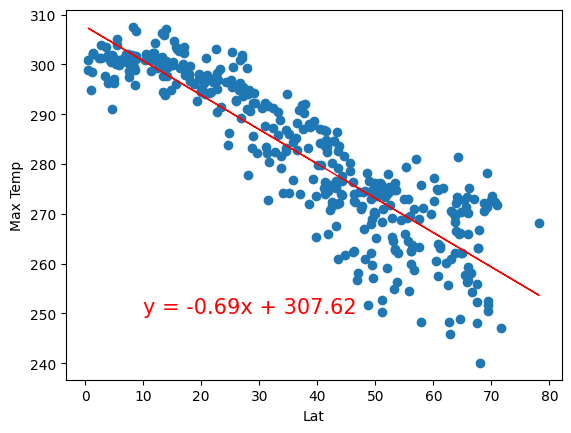

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", (10,250))

The r value is: 0.6869056662938294


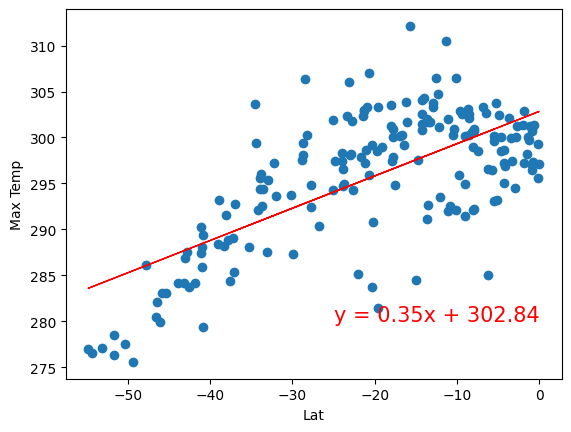

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", (-25,280) )

**Discussion about the linear relationship:** In examining the relationship between latitude and maximum temperature in both the Northern and Southern Hemispheres, distinct patterns emerge. In the Northern Hemisphere, the scatter plot reveals a strong negative correlation with an r-value of -0.89. The linear regression equation for this hemisphere, y = -0.69x + 307.62, further emphasizes the significant downward trend, suggesting that as one moves north from the equator, there is a notable decrease in maximum temperatures. Conversely, in the Southern Hemisphere, the scatter plot shows a moderate positive correlation with an r-value of 0.69. The linear regression equation for this hemisphere, y = 0.35x + 302.84, indicates a gradual increase in maximum temperatures as one moves towards the South Pole. These findings underscore the influence of latitude on temperature variations and highlight the contrasting temperature trends between the two hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.31203022536718783


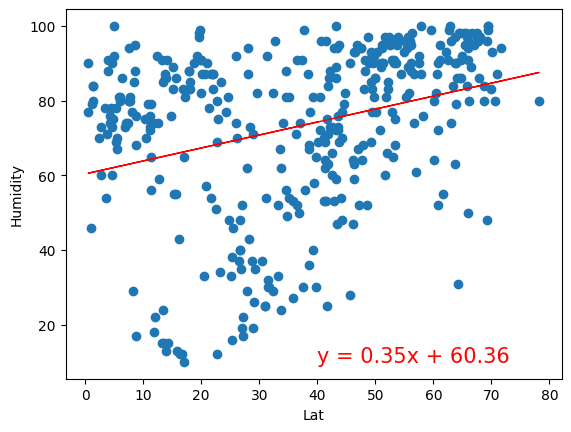

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", (40,10))

The r value is: 0.07194230004234134


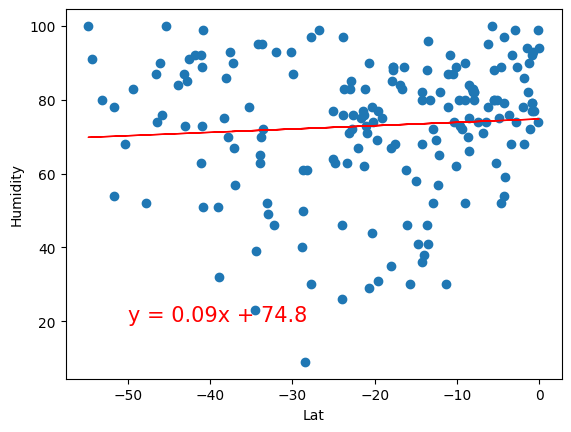

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", (-50,20))


**Discussion about the linear relationship:** Exploring the connection between latitude and humidity in both hemispheres reveals noteworthy geographical impacts on atmospheric moisture content. In the Northern Hemisphere, the scatter plot illustrates a moderate positive correlation, characterized by an r-value of approximately 0.31. The linear regression equation for this hemisphere, y = 0.35x + 60.36, indicates a subtle rise in humidity when moving northward from the equator. Conversely, the Southern Hemisphere displays a somewhat weaker positive correlation, with an r-value of around 0.07. The linear regression equation, y = 0.09x + 74.8, suggests a gradual increase in humidity towards lower latitudes in the southern region. Although these correlations are relatively modest, they illuminate the intricate relationship between latitude and humidity, underscoring the significance of considering specific hemisphere-related patterns to comprehend regional atmospheric conditions more comprehensively.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.08396750644301003


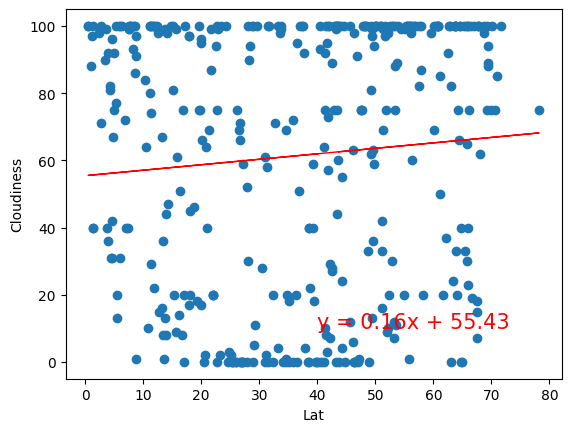

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", (40,10))

The r value is: 0.10360874807393013


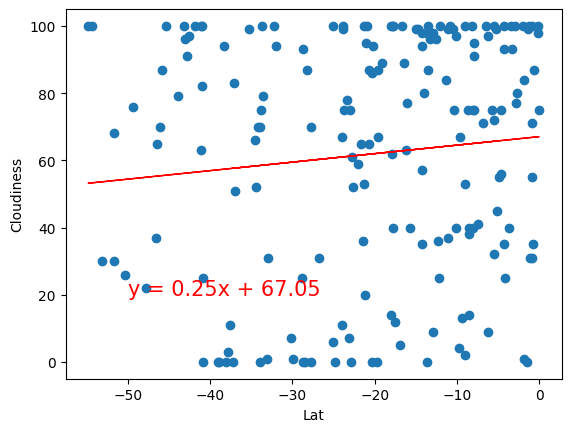

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", (-50,20))

**Discussion about the linear relationship:** Analyzing the linear relationship between latitude and cloudiness in both the Northern and Southern Hemispheres offers valuable insights into regional atmospheric patterns. In the Northern Hemisphere, the scatter plot reveals a weak positive correlation, reflected by an r-value of 0.08. The linear regression equation, y = 0.16x + 55.43, indicates a subtle increase in cloudiness as latitude moves away from the equator towards higher values. Conversely, the Southern Hemisphere displays a slightly weaker positive correlation, with an r-value of 0.10. The linear regression equation for the southern hemisphere, y = 0.25x + 67.05, suggests a gradual rise in cloudiness towards lower latitudes, approaching the South Pole. Although these correlations are relatively modest, they contribute significantly to our understanding of how latitude influences cloud cover. This underscores the importance of considering hemisphere-specific trends when studying regional weather patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.07783322330900433


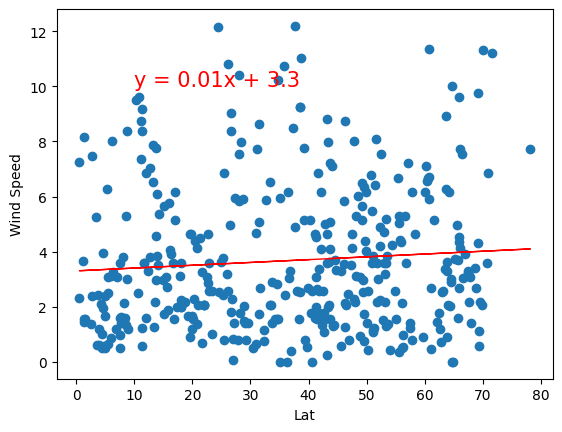

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", (10,10))

The r value is: -0.2833787334251914


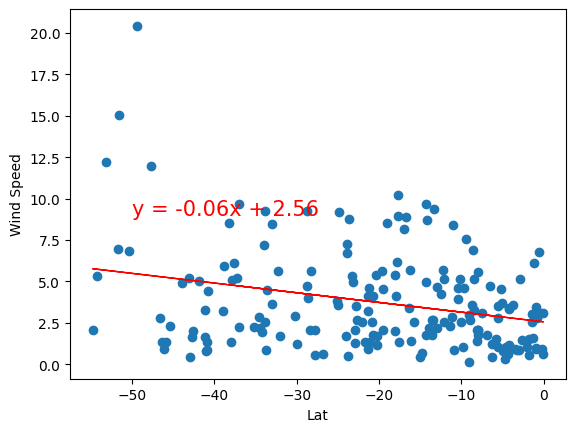

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", (-50,9))

**Discussion about the linear relationship:** Examining the linear relationship between latitude and wind speed in both the Northern and Southern Hemispheres uncovers intriguing patterns in atmospheric dynamics. In the Northern Hemisphere, the scatter plot shows a very weak positive correlation, indicated by an r-value of 0.08. The corresponding linear regression equation, y = 0.01x + 3.3, implies a minimal increase in wind speed as latitude increases northward from the equator. In contrast, the Southern Hemisphere exhibits a weak negative correlation, with an r-value of -0.28. The linear regression equation for the southern hemisphere, y = -0.06x + 2.56, suggests a slight decrease in wind speed towards the South Pole. Despite their modest correlations, these findings offer valuable insights into latitude-dependent variations in wind patterns, emphasizing the nuanced nature of regional atmospheric circulation.